## ECBM E6040 Homework 3 - Programming Problem

In [1]:
from __future__ import print_function

__docformat__ = 'restructedtext en'

import os
import sys
import timeit

import numpy
import scipy.io

import theano
import theano.tensor as T
import matplotlib
import pylab
%matplotlib inline
from theano.tensor.signal import downsample
from theano.tensor.shared_randomstreams import RandomStreams

from hw3_utils import shared_dataset
from hw3_nn import LeNetConvPoolLayer, train_nn
from hw3a import load_data, LogisticRegression, HiddenLayer, myMLP, test_mlp,test_noise_inject_at_input, noise_injection, test_noise_injection_at_weight
from hw3a import translate_image, test_data_augmentation, test_adversarial_example
from hw3b import test_lenet,test_convnet,test_CDNN

Using gpu device 0: GRID K520


### Problem a: Regularization Methods for Neural Network
#### Bullet 1: Implement a MLP

In [7]:
# TODO
# mlp with smaller set
accuracy = test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=100,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False, smaller_set=True)
# TODO
# mlp with complete set
accuracy = test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=100,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False, smaller_set=False)

... building the model
... training
Optimization complete.
Best validation score of 37.713068 % obtained at iteration 9888, with test performance 38.977833 %
... building the model
... training
Optimization complete.

The training process for function test_mlp ran for 1.38m
The training process for function test_mlp ran for 1.21m


Best validation score of 36.101974 % obtained at iteration 9785, with test performance 38.631466 %


#### Bullet 2: Experiment with noise injection at input

In [2]:
# TODO
# Inject a noise with miu = 0 and sigma = 0.01 and the accuracy improves from about 61% to about 68% compared to
# the result in (i).
test_noise_inject_at_input(learning_rate=0.01, L1_reg=0.00,
             L2_reg=0.0001, n_epochs=100,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False, noise_sigma = 0.01)

... building the model
... training
Optimization complete.
Best validation score of 30.894886 % obtained at iteration 16995, with test performance 31.858067 %


The training process for function test_noise_inject_at_input ran for 2.08m


#### Bullet 3: Experiment with noise injection at weights

In [2]:
# TODO
# Inject a noise with miu = 0 and sigma = 0.000001 and the accuracy almost maintains same compared to the result in (i).
test_noise_injection_at_weight(learning_rate=0.01,
             L1_reg=0.00, L2_reg=0.0001, n_epochs=100,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False, sigma_noise = 0.000001)

... building the model
... training
Optimization complete.
Best validation score of 37.784091 % obtained at iteration 9888, with test performance 39.289563 %


The training process for function test_noise_injection_at_weight ran for 23.58m


In [4]:
# Inject a noise with miu = 0 and sigma = 0.000001 and the accuracy almost maintains same compared to the result in (i).
test_noise_injection_at_weight(learning_rate=0.01,
             L1_reg=0.00, L2_reg=0.0001, n_epochs=100,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False, sigma_noise = 0.000005)

... building the model
... training
Optimization complete.
Best validation score of 37.784091 % obtained at iteration 9991, with test performance 39.081743 %


The training process for function test_noise_injection_at_weight ran for 30.03m


#### Bullet 4: Experiment with data augmentation

In [3]:
# After data augmentation the accuracy improves from about 61% to about 64.5% compared to the result in (i).
test_data_augmentation(learning_rate=0.01,
             L1_reg=0.00, L2_reg=0.0001, n_epochs=100,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 34.232955 % obtained at iteration 14935, with test performance 35.471829 %


The training process for function test_data_augmentation ran for 1.83m


#### Bullet 5: Experiment with adversarial examples

In [2]:
# TODO
# I fool the system by adding an imperceptibly small vector to the input, and look at the 13th train data, which 
# is correctly classified.
[ori_prob, ori_y, adver_prob, adver_y, test_x, new_test_x] = test_adversarial_example(learning_rate=0.01,
             L1_reg=0.00, L2_reg=0.0001, n_epochs=100,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 37.713068 % obtained at iteration 9888, with test performance 38.977833 %


The training process for function test_adversarial_example ran for 1.38m


[  1.40779780e-03   4.97302026e-01   1.82040203e-02   6.11487776e-02
   1.14458101e-02   1.59277383e-03   1.44041347e-04   3.89042318e-01
   2.47628568e-03   1.72361117e-02]
1
[  1.26469717e-03   2.00674519e-01   2.15944014e-02   6.15967400e-02
   2.96241161e-03   1.09285093e-03   6.04378838e-05   6.92572415e-01
   1.46795332e-03   1.67135242e-02]
7


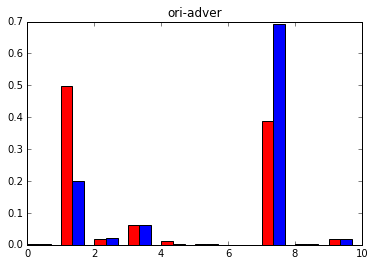

In [9]:
# It used to be classified correctly as 1, but after using adversarial examples, it is misclassified as 7.
print(ori_prob)
print(ori_y)
print(adver_prob)
print(adver_y)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.switch_backend('agg')

N = 10
ind = np.arange(N)
width = 0.35
plt.bar(ind, ori_prob, width, color='r')#, yerr=menStd)
plt.bar(ind+width, adver_prob, width, color='b')#, yerr=womenStd)

plt.title('ori-adver')

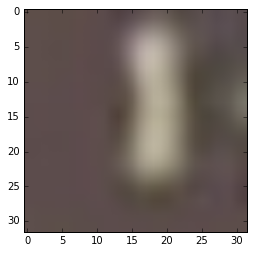

In [44]:
# This is the original input
x = test_x[13].reshape((3,32,32))
x= x.transpose(1,2,0)*255
x = numpy.asarray(x, numpy.int8)
plt.imshow(x)

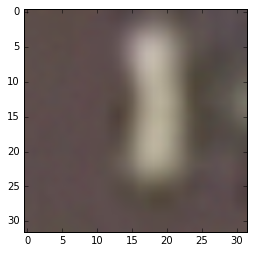

In [46]:
# This is the new input after adding small vector to the input
x = new_test_x[13].reshape((3,32,32))
x = x.transpose(1,2,0)*255
x = numpy.asarray(x, numpy.int8)
plt.imshow(x)

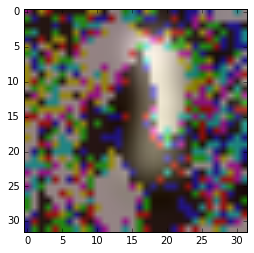

In [48]:
# This is the new input after adding small vector to the input. I change the image type to float 64 in order to 
# see the changes
x = new_test_x[13].reshape((3,32,32))
x = x.transpose(1,2,0)*255
y = numpy.asarray(x, numpy.float64)
plt.imshow(y)

### Problem b: Convolutional Neural Network
#### Bullet 1: Implement an CNN

In [2]:
# TODO
# As the the number of filters in hidden layers decreases, the accuracy slightly decreases.
accuracy = test_lenet(learning_rate=0.1, n_epochs=1000, nkerns=[16, 512],
            batch_size=200, verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 9.333333 % obtained at iteration 9870, with test performance 10.519231 %


The training process for function test_lenet ran for 11.25m


In [3]:
accuracy = test_lenet(learning_rate=0.1, n_epochs=1000, nkerns=[8, 512],
            batch_size=200, verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 9.736111 % obtained at iteration 9870, with test performance 10.757692 %


The training process for function test_lenet ran for 8.15m


In [4]:
accuracy = test_lenet(learning_rate=0.1, n_epochs=1000, nkerns=[16, 256],
            batch_size=200, verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 9.013889 % obtained at iteration 9870, with test performance 10.638462 %


The training process for function test_lenet ran for 6.60m


#### Bullet 2: Implement a multi-stage CNN

In [2]:
# TODO
# As the the number of filters in hidden layers decreases, the accuracy decreases.
# The shape of filters slightly influences the accuracy.
test_convnet(learning_rate=0.1, n_epochs=1000, nkerns=[16, 512, 20],
        batch_size=200, verbose=False, shapes = [3, 6], ds_value = 3)

... building the model
... training
Optimization complete.
Best validation score of 11.916667 % obtained at iteration 5264, with test performance 13.288462 %


The training process for function test_convnet ran for 13.88m


In [3]:
accuracy = test_convnet(learning_rate=0.1, n_epochs=1000, nkerns=[8, 256, 10],
        batch_size=200, verbose=False, shapes = [3, 6], ds_value = 3)

... building the model
... training
Optimization complete.
Best validation score of 26.847222 % obtained at iteration 987, with test performance 28.976923 %


The training process for function test_convnet ran for 5.30m


In [4]:
accuracy = test_convnet(learning_rate=0.1, n_epochs=1000, nkerns=[16, 512, 20],
        batch_size=200, verbose=False, shapes = [9, 5], ds_value = 3)

... building the model
... training
Optimization complete.
Best validation score of 11.486111 % obtained at iteration 9870, with test performance 12.234615 %


The training process for function test_convnet ran for 9.27m


#### Bullet 3: Explain why the back-propogation algorithm works on ms-cnn

Backpropagation calculates the gradient of a loss function with respect to all the weights in the network. The gradient is fed to the optimization method which in turn uses it to update the weights, in an attempt to minimize the loss function.

This model has a known, desired output for each input value in order to calculate the loss function gradient. It also has the activation function used by the artificial neurons (or "nodes") be differentiable, thus backpropagation can be applied to this model. We can go through backpropagation as follow:

To compute the gradient of some scalars with respect to one of its ancestors x in the graph, we begin by observing that the gradient with respect to z is given by dz/dz = 1. We can then compute the gradient with respect to each parent of z in the graph by multiplying the current gradient by the Jacobian of the operation that produced z. We continue multiplying by Jacobians traveling backwards through the graph in this way until we reach x. For any node that may be reached by going backwards from z through two or more paths, we simply sum the gradients arriving from different paths at that node.

references:
http://www.deeplearningbook.org/contents/mlp.html
https://en.wikipedia.org/wiki/Backpropagation

#### Bullet 4: Implement CNN plus MLP

In [2]:
# TODO
# This model performs much better compared to the MLP with 4 hidden layers (with accuracy about 70%) in hw2.
test_CDNN(learning_rate=0.1, n_epochs=1000, nkerns=[16, 512], batch_size=200, verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 9.875000 % obtained at iteration 3290, with test performance 10.923077 %


The training process for function test_CDNN ran for 11.07m


Bonus i:

In [2]:
from hw3b import test_gaussian, make_Gaussian

In [3]:
#use the original filters without updating layer0
test_gaussian(learning_rate=0.1, n_epochs=1000, nkerns=[16, 512],
            batch_size=200, verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 10.750000 % obtained at iteration 9541, with test performance 12.096154 %


The training process for function test_gaussian ran for 8.85m


In [4]:
#use Gaussian filters without updating layer0
test_gaussian(learning_rate=0.1, n_epochs=1000, nkerns=[16, 512],
            batch_size=200, verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 10.750000 % obtained at iteration 9541, with test performance 12.092308 %


The training process for function test_gaussian ran for 8.84m


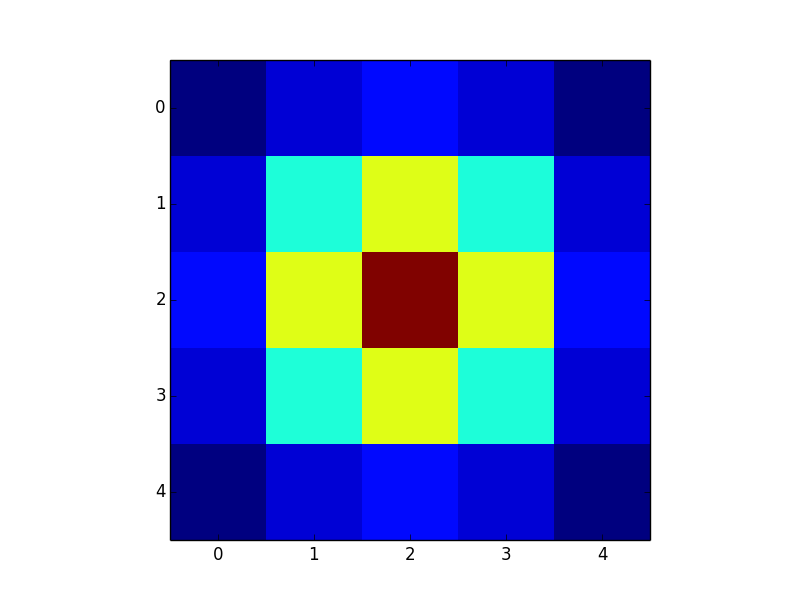

In [3]:
# This is the gaussian filter I used
# reference: https://gist.github.com/andrewgiessel/4635563
import matplotlib.pyplot as plt
plt.imshow(make_Gaussian(size = 5), interpolation='none')
plt.savefig('gaussian.png')
from IPython.display import Image
Image(filename='gaussian.png')

Bonus ii:

In [32]:
accuracy = test_lenet(learning_rate=0.1, n_epochs=1000, nkerns=[4, 8],
            batch_size=200, verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 12.625000 % obtained at iteration 9870, with test performance 13.734615 %


The training process for function test_lenet ran for 1.55m


In [49]:
accuracy = test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=100,
             batch_size=128, n_hidden=[4*28*28, 8*10*10, 500], n_hiddenLayers=3,
             verbose=False, smaller_set=True)

... building the model
... training
Optimization complete.
Best validation score of 35.085227 % obtained at iteration 9991, with test performance 35.748922 %


The training process for function test_mlp ran for 6.37m


We can see that using the same number of neurons, the run time of CNN is much smaller than that of MLP. Meanwhile, the testing accuracy is higher than that of MLP.